<a href="https://colab.research.google.com/github/Bhimsendabby/ImageColorization/blob/main/ImageColorizationUsingAutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install -q kaggle

In [3]:
! mkdir /content/.kaggle

In [4]:
!chmod 600 /content/kaggle.json

chmod: cannot access '/content/kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d pavansanagapati/images-dataset

Dataset URL: https://www.kaggle.com/datasets/pavansanagapati/images-dataset
License(s): CC0-1.0
 99% 1.01G/1.01G [00:12<00:00, 110MB/s]
100% 1.01G/1.01G [00:12<00:00, 90.2MB/s]


In [6]:
!unzip images-dataset.zip

Archive:  images-dataset.zip
  inflating: data/bike/bike_001.bmp  
  inflating: data/bike/bike_002.bmp  
  inflating: data/bike/bike_003.bmp  
  inflating: data/bike/bike_004.bmp  
  inflating: data/bike/bike_005.bmp  
  inflating: data/bike/bike_006.bmp  
  inflating: data/bike/bike_007.bmp  
  inflating: data/bike/bike_008.bmp  
  inflating: data/bike/bike_009.bmp  
  inflating: data/bike/bike_010.bmp  
  inflating: data/bike/bike_011.bmp  
  inflating: data/bike/bike_012.bmp  
  inflating: data/bike/bike_013.bmp  
  inflating: data/bike/bike_014.bmp  
  inflating: data/bike/bike_015.bmp  
  inflating: data/bike/bike_016.bmp  
  inflating: data/bike/bike_017.bmp  
  inflating: data/bike/bike_018.bmp  
  inflating: data/bike/bike_019.bmp  
  inflating: data/bike/bike_020.bmp  
  inflating: data/bike/bike_021.bmp  
  inflating: data/bike/bike_022.bmp  
  inflating: data/bike/bike_023.bmp  
  inflating: data/bike/bike_024.bmp  
  inflating: data/bike/bike_025.bmp  
  inflating: data/bik

In [7]:
!kaggle datasets download -d jehanbhathena/weather-dataset

Dataset URL: https://www.kaggle.com/datasets/jehanbhathena/weather-dataset
License(s): CC0-1.0
 98% 572M/587M [00:03<00:00, 216MB/s]
100% 587M/587M [00:03<00:00, 188MB/s]


In [8]:
!unzip weather-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/frost/3913.jpg  
  inflating: dataset/frost/3914.jpg  
  inflating: dataset/frost/3915.jpg  
  inflating: dataset/frost/3916.jpg  
  inflating: dataset/frost/3917.jpg  
  inflating: dataset/frost/3918.jpg  
  inflating: dataset/frost/3919.jpg  
  inflating: dataset/frost/3920.jpg  
  inflating: dataset/frost/3921.jpg  
  inflating: dataset/frost/3922.jpg  
  inflating: dataset/frost/3923.jpg  
  inflating: dataset/frost/3924.jpg  
  inflating: dataset/frost/3925.jpg  
  inflating: dataset/frost/3926.jpg  
  inflating: dataset/frost/3927.jpg  
  inflating: dataset/frost/3928.jpg  
  inflating: dataset/frost/3929.jpg  
  inflating: dataset/frost/3930.jpg  
  inflating: dataset/frost/3931.jpg  
  inflating: dataset/frost/3932.jpg  
  inflating: dataset/frost/3933.jpg  
  inflating: dataset/frost/3934.jpg  
  inflating: dataset/frost/3935.jpg  
  inflating: dataset/frost/3936.jpg  
  inflating: dataset/frost/3937.jpg  

In [23]:
import numpy as np
import pandas as pd
import matplotlib as plt
import cv2
import os
import zipfile
import matplotlib.pyplot as plt
import os
import PIL
import keras
import tensorflow as tf
from keras import layers, models
import time
from IPython import display
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score, roc_curve

from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave

#path to the directories
categories_1 = ['bike','cars','cats','data','dogs','flowers','horses','human']

#path to the directories
categories_2 = ['dew','fogsmog','frost','glaze','hail','lightning','rain','rainbow','rime','sandstorm','snow']

#Set the image size
IMAGE_SIZE = 256

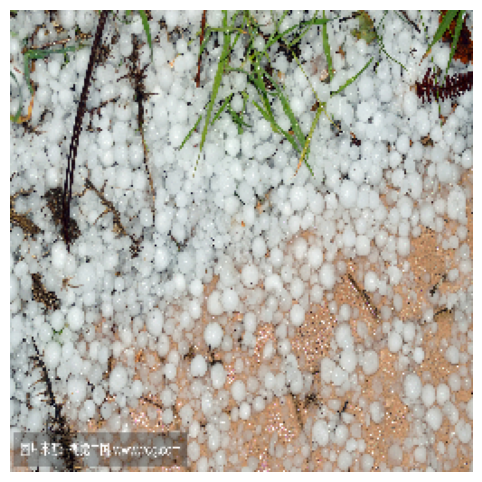

In [30]:
img = load_img("/content/dataset/hail/0002.jpg",target_size=(IMAGE_SIZE, IMAGE_SIZE))
x = img_to_array(img)/255.0

x = array_to_img(x)
# Display some images
fig = plt.figure(figsize=(12, 6))  # Adjust width and height as needed

plt.imshow(x)
plt.axis('off')

plt.show()

In [46]:
#Normalize images - divide by 255
train_datagen = ImageDataGenerator(rescale=1. / 255)

#Resize images, if needed
train_2 = train_datagen.flow_from_directory("/content/dataset/",
                                          target_size=(256, 256),
                                          batch_size=470,
                                          shuffle=True,
                                          class_mode=None)

Found 6862 images belonging to 11 classes.


In [49]:
X_1 =[]
Y_1 =[]
X_2 =[]
Y_2 =[]



for img in train_2[0]:
  try:
    lab = rgb2lab(img)
    X_2.append(lab[:,:,0])
    Y_2.append(lab[:,:,1:] / 128) #A and B values range from -127 to 128,
        #so we divide the values by 128 to restrict values to between -1 and 1.
  except:
    print('error')

# folder_path = "/content/dataset/"
# category = "frost"
# img_path = f"{folder_path}{category}/"
# print(img_path)
# for img in os.listdir(img_path):
#   try:
#     #Resizing the image
#     image = load_img(os.path.join(img_path,img),target_size=(IMAGE_SIZE, IMAGE_SIZE))

#     x = img_to_array(image)/255.0
#     y = array_to_img(x)

#     lab = rgb2lab(y)

#     X_1.append(lab[:,:,0])
#     Y_1.append(lab[:,:,1:] / 128)
#   except:
#     print('error')


X_2 = np.array(X_2)
Y_2 = np.array(Y_2)


X_2 = X_2.reshape(X_2.shape+(1,))

In [50]:
print(X_2.shape)
print(Y_2.shape)

(470, 256, 256, 1)
(470, 256, 256, 2)


In [14]:
for img in train_2[0]:
  try:
    lab = rgb2lab(img)
    X_2.append(lab[:,:,0])
    Y_2.append(lab[:,:,1:] / 128) #A and B values range from -127 to 128,
        #so we divide the values by 128 to restrict values to between -1 and 1.
  except:
    print('error')


X_2 = np.array(X_2)
Y_2 = np.array(Y_2)

X_2 = X_2.reshape(X_2.shape+(1,)) #dimensions to be the same for X and Y

In [15]:
print(X_2.shape)
print(Y_2.shape)

(340, 256, 256, 1)
(340, 256, 256, 2)


In [16]:
# Define the Autoencoder model
def build_autoencoder(input_shape, latent_dim):

     # Encoder
    encoder_inputs = layers.Input(shape=input_shape)
    encoder = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_inputs)
    encoder = layers.MaxPooling2D((2, 2), padding='same')(encoder)
    encoder = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoder)
    encoder = layers.MaxPooling2D((2, 2), padding='same')(encoder)
    encoder = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoder)
    encoder = layers.MaxPooling2D((2, 2), padding='same')(encoder)

    encoder = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(encoder)
    encoder = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(encoder)
    encoder = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(encoder)
    # Latent Space
    latent_vector = layers.Flatten()(encoder)
    latent_vector = layers.Dense(latent_dim, activation='relu')(latent_vector)

    # Decoder
    decoder_inputs = layers.Dense(16 * 16 * 128, activation='relu')(latent_vector)
    decoder = layers.Reshape((16, 16, 128))(decoder_inputs)
    decoder = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(decoder)
    decoder = layers.UpSampling2D((2, 2))(decoder)
    decoder = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(decoder)
    decoder = layers.UpSampling2D((2, 2))(decoder)
    decoder = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(decoder)
    decoder = layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(decoder)
    decoder = layers.UpSampling2D((2, 2))(decoder)

    decoder = layers.Conv2D(2, (3, 3), activation='tanh', padding='same')(decoder)
    decoder_outputs = layers.UpSampling2D((2, 2))(decoder)

    # Define the autoencoder model
    autoencoder = models.Model(encoder_inputs, decoder_outputs)
    return autoencoder

In [17]:
input_shape = (256, 256, 1)  # Example input shape (grayscale images)
latent_dim = 128  # Example latent dimension size
autoencoder = build_autoencoder(input_shape, latent_dim)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856 

In [55]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
#Decoder
#Note: For the last layer we use tanh instead of Relu.
#This is because we are colorizing the image in this layer using 2 filters, A and B.
#A and B values range between -1 and 1 so tanh (or hyperbolic tangent) is used
#as it also has the range between -1 and 1.
#Other functions go from 0 to 1.
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()


model.fit(X_2,Y_2,validation_split=0.1, epochs=20, batch_size=16)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_21 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_22 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 conv2d_23 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 512)      

In [52]:
autoencoder.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])

autoencoder.fit(X_2,Y_2,validation_split=0.1, epochs=20, batch_size=16)

Epoch 1/20
27/27 [==============================] - 13s 300ms/step - loss: 0.0180 - accuracy: 0.5191 - val_loss: 0.0125 - val_accuracy: 0.6338
Epoch 2/20
27/27 [==============================] - 2s 84ms/step - loss: 0.0179 - accuracy: 0.5215 - val_loss: 0.0127 - val_accuracy: 0.6198
Epoch 3/20
27/27 [==============================] - 2s 79ms/step - loss: 0.0179 - accuracy: 0.5226 - val_loss: 0.0126 - val_accuracy: 0.6294
Epoch 4/20
27/27 [==============================] - 2s 78ms/step - loss: 0.0179 - accuracy: 0.5264 - val_loss: 0.0125 - val_accuracy: 0.6367
Epoch 5/20
27/27 [==============================] - 2s 75ms/step - loss: 0.0179 - accuracy: 0.5207 - val_loss: 0.0126 - val_accuracy: 0.6289
Epoch 6/20
27/27 [==============================] - 2s 79ms/step - loss: 0.0179 - accuracy: 0.5240 - val_loss: 0.0126 - val_accuracy: 0.6274
Epoch 7/20
27/27 [==============================] - 2s 78ms/step - loss: 0.0179 - accuracy: 0.5214 - val_loss: 0.0126 - val_accuracy: 0.6297
Epoch 8/20


1/1 [==============================] - 1s 863ms/step


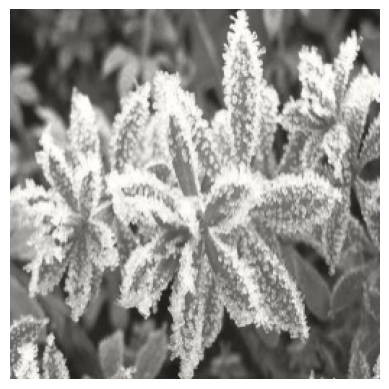

In [56]:
img1_color=[]

img1=img_to_array(load_img('/content/dataset/frost/3600.jpg'))
img1 = resize(img1 ,(256,256))
img1_color.append(img1)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]

plt.imshow(lab2rgb(result))
plt.axis('off')

plt.show()